In [82]:
schedue = [["2020/2/26",2_910_00_00],["2021/3/26",1_740_000_000]]

In [1]:
import sys,requests,json
import pandas as pd 
from absbox.local.china import 信贷ABS,show,mkAssumption,mkCallOptions
from absbox import API,save
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)



#localAPI = API("https://deal-bench.xyz")
localAPI = API("http://localhost:8081")

ERROR:root:中文字体载入失败
/tmp/ipykernel_1360403/1225350850.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [37]:
# 浮动利率 
test04 = 信贷ABS(
    "浮动利率案例"
    ,("2022-07-26","2022-07-26","2022-08-26")
    ,"每月"
    ,(["按揭贷款"
        ,{"放款金额":120,"放款利率":["浮动",0.085,{"基准":"LPR5Y","利差":0.01,"重置频率":"每月"}],"初始期限":30
          ,"频率":"每月","类型":"等额本金","放款日":"2020-06-01"}
          ,{"当前余额":120
          ,"当前利率":0.03
          ,"剩余期限":10}],
     )
    ,(("账户01",{"余额":0}),)
    ,(("A1",{"当前余额":100
             ,"当前利率":0.07
             ,"初始余额":100
             ,"初始利率":0.07
             ,"起息日":"2020-01-03"
             ,"利率":{"固定":0.08}
             ,"债券类型":{"固定摊还":[["2021-06-26",80],["2021-07-26",70]]}
             })
      ,("B",{"当前余额":20
             ,"当前利率":0.0
             ,"初始余额":100
             ,"初始利率":0.07
             ,"起息日":"2020-01-03"
             ,"利率":{"固定":0.00}
             ,"债券类型":{"权益":None}
             }))
    ,tuple()
    ,{"未违约":[
         ["支付利息","账户01",["A1"]]
         ,["支付本金","账户01",["A1"]]
         ,["支付本金","账户01",["B"]]
         ,["支付收益","账户01","B"]
    ]
     ,"回款后":[]}
    ,(["利息回款","账户01"]
      ,["本金回款","账户01"]
      ,["早偿回款","账户01"]
      ,["回收回款","账户01"])
    ,None
)

In [38]:
localAPI.build_req(test04,assumptions=[{"CPR":0.00},{"CDR":0.00},{"回收":(0.7,18)},{"利率":["LPR5Y",[["2021-05-01",0.05],["2021-09-01",0.07]]]}],pricing=None)

'{"deal": {"dates": {"closing-date": "2022-07-26", "cutoff-date": "2022-07-26", "first-pay-date": "2022-08-26"}, "name": "浮动利率案例", "pool": {"assets": [null], "asOfDate": "2022-07-26"}, "bonds": {"A1": {"bndName": "A1", "bndBalance": 100, "bndRate": 0.07, "bndOriginInfo": {"originBalance": 100, "originDate": "2020-01-03", "originRate": 0.07}, "bndInterestInfo": {"tag": "Fix", "contents": 0.08}, "bndType": {"tag": "PAC", "contents": {"tag": "AmountCurve", "contents": [["2021-06-26", 80], ["2021-07-26", 70]]}}, "bndDuePrin": 0, "bndDueInt": 0}, "B": {"bndName": "B", "bndBalance": 20, "bndRate": 0.0, "bndOriginInfo": {"originBalance": 100, "originDate": "2020-01-03", "originRate": 0.07}, "bndInterestInfo": {"tag": "Fix", "contents": 0.0}, "bndType": {"tag": "Equity"}, "bndDuePrin": 0, "bndDueInt": 0}}, "waterfall": {"DistributionDay": [{"tag": "PayInt", "contents": ["账户01", ["A1"]]}, {"tag": "PayPrin", "contents": ["账户01", ["A1"]]}, {"tag": "PayPrin", "contents": ["账户01", ["B"]]}, {"tag": 

In [39]:
r = localAPI.run(test04,assumptions=[{"CPR":0.00},{"CDR":0.00},{"回收":(0.7,18)},{"利率":["LPR5Y",[["2021-05-01",0.05],["2021-09-01",0.20]]]}],read=True)
r['pool']['flow']

Error in response: Invalid Arguments: When parsing the constructor Mortgage of type Asset.Mortgage expected Array but got Null.


TypeError: 'NoneType' object is not subscriptable

In [2]:
from absbox import API
from absbox.local.china import 信贷ABS,show
import matplotlib.pyplot as plt
# 浮动利率 
import numpy as np
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,}'.format

JY_RMBS_2017_5 = 信贷ABS(
    "建元2017年第五期个人住房抵押贷款资产支持证券"
    ,("2022-07-26","2022-07-26","2022-08-26")
    ,"每月"
    ,{'清单':[["按揭贷款"
        ,{"放款金额":120,"放款利率":["浮动",0.085,{"基准":"LPR5Y","利差":0.01,"重置频率":"每月"}],"初始期限":30
          ,"频率":"每月","类型":"等额本金","放款日":"2020-06-01"}
          ,{"当前余额":2_261_042_196.13
          ,"当前利率":0.0444
          ,"剩余期限":106
          ,"状态":"正常"}]
      ,["按揭贷款"
        ,{"放款金额":0,"放款利率":["浮动",0.085,{"基准":"LPR5Y","利差":0.01,"重置频率":"每月"}],"初始期限":30
          ,"频率":"每月","类型":"等额本金","放款日":"2020-06-01"}
          ,{"当前余额": 81_403_764.08
          ,"当前利率":0.0444
          ,"剩余期限":106
          ,"状态":"违约"}]]
     }
    ,(("本金分账户",{"余额":0 })
      ,("收入分账户",{"余额":0,"记录":[("2019-12-01",0,-81_403_764.08,"To:本金分账户|ABCD")]})
      )
    ,(("A1",{"当前余额":0.00
             ,"当前利率":0.051
             ,"初始余额":2_903_000_000.00
             ,"初始利率":0.051
             ,"起息日":"2020-01-03"
             ,"利率":{"浮动":["LPR5Y",0.012,{"重置月份":3}]}
             ,"债券类型":{"过手摊还":None}
             })
       ,("A2",{"当前余额":0.00
             ,"当前利率":0.051
             ,"初始余额":2_903_000_000.00
             ,"初始利率":0.051
             ,"起息日":"2020-01-03"
             ,"利率":{"浮动":["LPR5Y",0.012,{"重置月份":3}]}
             ,"债券类型":{"过手摊还":None}
             })
       ,("A3",{"当前余额":1_456_725_400.00
             ,"当前利率":0.051
             ,"初始余额":2_903_000_000.00
             ,"初始利率":0.051
             ,"起息日":"2020-01-03"
             ,"利率":{"浮动":["LPR5Y",0.002,{"重置月份":3}]}
             ,"债券类型":{"过手摊还":None}
             })
      ,("次级",{"当前余额":795_626_718.16
             ,"当前利率":0.0
             ,"初始余额":795_626_718.16
             ,"初始利率":0.0
             ,"起息日":"2020-01-03"
             ,"利率":{"固定":0.00}
             ,"债券类型":{"权益":None}
             }))
    ,(("增值税",{"类型":{"百分比费率":["资产池当期利息",0.0326]}})
      ,("服务商费用",{"类型":{"年化费率":["资产池余额",0.0012]}})
      ,("报销",{"类型":{"周期费用":["每月",60000]}})
     )
    ,{"未违约":[
        ["支付费用限额",["收入分账户"],["服务商费用"],{"应计费用百分比":0.5}]
         ,["支付费用限额",["收入分账户"],["报销"],{"应计费用上限":50000}]
         ,["支付利息","收入分账户",["A1","A2","A3"]]
         ,["支付费用",["收入分账户"],["服务商费用"]]
         ,["按公式账户转移","收入分账户","本金分账户","A+B+C-D"]
         ,["支付费用",["收入分账户"],["报销"]]
         ,["账户转移","收入分账户","本金分账户"]
         ,["支付本金","本金分账户",["A1"]]
         ,["支付本金","本金分账户",["A2"]]
         ,["支付本金","本金分账户",["A3"]]
         ,["支付本金","本金分账户",["次级"]]
         ,["支付收益","本金分账户","次级"]
      ]
     ,"回款后":[["支付费用",["收入分账户"],["增值税"]]]
     ,"清仓回购":[]}
    ,(["利息回款","收入分账户"]
      ,["本金回款","本金分账户"]
      ,["早偿回款","本金分账户"]
      ,["回收回款","本金分账户"])
    ,None
)

#localAPI = API("https://deal-bench.xyz/api")
localAPI = API("http://localhost:8081")

myAssumption = [{"CPR":0.005}
                ,{"回收":(0.7,18)}
                ,{"CDR":0.00}
                ,{"利率":["LPR5Y",[["2020-05-01",0.049]]]}
                ]

myPricing = {"贴现日":"2022-07-26","贴现曲线":[["2020-01-01",0.03]]} 

r = localAPI.run(JY_RMBS_2017_5
             ,assumptions= myAssumption
             ,pricing= myPricing               
             ,read=True)

sending req 2022-08-18 00:17:04.433220
done req 2022-08-18 00:17:04.437053
Error in response: Invalid Arguments: When parsing Asset.Mortgage expected Object but got Array.


/tmp/ipykernel_559171/2970859689.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [22]:
multiAssumption = [
                [{"CPR":0.005}
                ,{"回收":(0.7,18)}
                ,{"CDR":0.00}
                ,{"利率":["LPR5Y",[["2020-05-01",0.049]]]}]
    ,[{"CPR":0.006}
                ,{"回收":(0.7,18)}
                ,{"CDR":0.00}
                ,{"利率":["LPR5Y",[["2020-05-01",0.049]]]}]
    ,[{"CPR":0.007}
                ,{"回收":(0.7,18)}
                ,{"CDR":0.00}
                ,{"利率":["LPR5Y",[["2020-05-01",0.049]]]}]    
]


r = localAPI.run(JY_RMBS_2017_5
             ,assumptions= multiAssumption
             ,pricing= myPricing               
             ,read=False)

sending req 2022-08-12 10:13:03.541557
done req 2022-08-12 10:13:04.188746
2022-08-12 10:13:04.248274


In [ ]:
r[1]['pricing']

In [5]:
r[0]['pricing']

,估值,票面估值,WAL,久期
A2,0,0.0,0.0,0.0
A1,0,0.0,0.0,0.0
A3,1526312800,52.577084,2.337854,2.2061107
次级,965000500,121.2881,5.984067,6.631383


In [6]:
r[2]['pricing']

,估值,票面估值,WAL,久期
A2,0,0.0,0.0,0.0
A1,0,0.0,0.0,0.0
A3,1525718300,52.556602,2.3170671,2.1875865
次级,964082500,121.172714,5.9591603,6.6090226


In [3]:
localAPI.build_req(JY_RMBS_2017_5
             ,assumptions= multiAssumption
             ,pricing= myPricing)

'{"_deal": {"dates": {"closing-date": "2022-07-26", "cutoff-date": "2022-07-26", "first-pay-date": "2022-08-26"}, "name": "建元2017年第五期个人住房抵押贷款资产支持证券", "pool": {"assets": [[{"originBalance": 120, "originRate": {"tag": "Floater", "contents": ["LPR5Y", 0.01, 0.085, "Monthly", null]}, "originTerm": 30, "period": "Monthly", "startDate": "2020-06-01", "prinType": "Even"}, 2261042196.13, 0.0444, 106, {"tag": "Current"}], [{"originBalance": 0, "originRate": {"tag": "Floater", "contents": ["LPR5Y", 0.01, 0.085, "Monthly", null]}, "originTerm": 30, "period": "Monthly", "startDate": "2020-06-01", "prinType": "Even"}, 81403764.08, 0.0444, 106, {"tag": "Defaulted", "contents": null}]], "asOfDate": "2022-07-26"}, "bonds": {"A1": {"bndName": "A1", "bndBalance": 0.0, "bndRate": 0.051, "bndOriginInfo": {"originBalance": 2903000000.0, "originDate": "2020-01-03", "originRate": 0.051}, "bndInterestInfo": {"tag": "Floater", "contents": ["LPR5Y", 0.012, {"tag": "MonthOfYear", "contents": 3}, null, null]}, "b

In [9]:
r['bonds']['次级']

,余额,利息,本金,执行利率,本息合计,备注
日期,,,,,,
2022-08-26,795626700,0,0,0,0,
2022-09-26,795626700,0,0,0,0,
2022-10-26,795626700,0,0,0,0,
2022-11-26,795626700,0,0,0,0,
2022-12-26,795626700,0,0,0,0,
2023-01-26,795626700,0,0,0,0,
2023-02-26,795626700,0,0,0,0,
2023-03-26,795626700,0,0,0,0,
2023-04-26,795626700,0,0,0,0,


In [ ]:
r['bonds']['A3']

<AxesSubplot:xlabel='日期'>

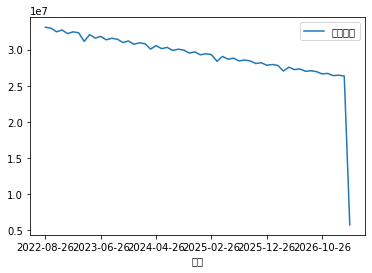

In [65]:
r['bonds']['A3'].plot(kind='line',y='本息合计')

In [30]:
r['pricing']

,估值,票面估值,WAL,久期
A2,0,0.0,0.0,0.0
A1,0,0.0,0.0,0.0
A3,1527829800,52.62934,2.3908978,2.253299
次级,967311100,121.578514,6.046559,6.687229


In [9]:
r['accounts']['收入分账户']

,余额,变动额,备注
日期,,,
2019-12-01,0.0,"-81,403,770.0",To:本金分账户|ABCD
2022-07-26,"11,482,461.0","11,482,461.0",Deposit CF from Pool
2022-07-26,"11,108,133.0","-374,328.0",Pay Fee
2022-08-26,"10,987,107.0","-121,026.0",Pay Fee
2022-08-26,"10,937,107.0","-50,000.0",Pay Fee
2022-08-26,"4,627,291.0","-6,309,816.0",Pay Int
2022-08-26,"4,506,264.5","-121,026.5",Pay Fee
2022-08-26,"4,506,264.5",0.0,To:本金分账户|ABCD
2022-08-26,"4,496,264.5","-10,000.0",Pay Fee


In [66]:
cprs = [{"CPR":c} for c in [0.00,0.015,0.025,0.028]]
my_assump = [{"CDR":0.004},{"回收":(0.7,18)},{"利率":["LPR5Y",[["2021-05-01",0.05],["2021-09-01",0.20]]]}]
results = [ localAPI.run(JY_RMBS_2017_5
                         ,assumptions=my_assump+[_cpr]
                         ,read=True
                         ,pricing= myPricing
                        ) for _cpr in cprs ]

/usr/lib/python3.10/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'deal-bench.xyz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/usr/lib/python3.10/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'deal-bench.xyz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/usr/lib/python3.10/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'deal-bench.xyz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/usr/lib/python3.10/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning

In [33]:
cprs = [{"CPR":c} for c in [0.00,0.015,0.025,0.028]]
my_assump = [{"CDR":0.004},{"回收":(0.7,18)},{"利率":["LPR5Y",[["2021-05-01",0.05],["2021-09-01",0.20]]]}]
results = [ localAPI.run(JY_RMBS_2017_5
                         ,assumptions=my_assump+[_cpr]
                         ,read=True
                         ,pricing= myPricing
                        ) for _cpr in cprs ]

KeyError: 'B'

In [47]:
results[0]['pricing']

,估值,票面估值,WAL,久期
A2,0,0.000000,0.0,0.000000
A1,0,0.000000,0.0,0.000000
A3,1279567600,44.077423,NaN,4.679771
次级,783637250,98.493080,NaN,4.888173


In [39]:
[ r['pricing'].loc["A3","票面估值"] for r in results ]

[57.1034, 56.646294, 56.358753, 56.276894]

In [35]:
results[0]['pricing']

,估值,票面估值,WAL,久期
A2,0,0.0,0.0,0.0
A1,0,0.0,0.0,0.0
A3,1657711900,57.1034,1.3404843,1.3058869
次级,2175969000,273.4912,3.4165509,5.284363


[178277062, 174117648, 171362858, 169990510]

In [24]:
show(r)

资产池                                                       \
                     资产池                                                        
                    未偿余额          本金           利息 早偿金额        违约金额       回收金额   
日期                                                                              
2017-06-15  2.182961e+09  75274504.0  11291176.00  0.0  2806960.80        0.0   
2017-07-15  2.104982e+09  75177936.0  11264162.00  0.0  2800326.30        0.0   
2017-08-15  2.027200e+09  75081496.0  10861791.00  0.0  2700294.80        0.0   
2017-09-15  1.949696e+09  74988296.0  10123420.00  0.0  2516659.00        0.0   
2017-10-15  1.872302e+09  74892096.0  10060506.00  0.0  2501091.30        0.0   
2017-11-15  1.795179e+09  74799120.0   9349891.00  0.0  2324361.50        0.0   
2017-11-26           NaN         NaN          NaN  NaN         NaN        NaN   
2017-12-15  1.718173e+09  74703170.0   9263194.00  0.0  2302875.50        0.0   
2017-12-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-01-15  1.641362e+09  74607344.0   8865840.00  0.0  2204091.50        0.0   
2018-01-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-02-15  1.564939e+09  74520896.0   7650812.50  0.0  1901869.10        0.0   
2018-02-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-03-15  1.488506e+09  74425296.0   8075145.00  0.0  2007520.90        0.0   
2018-03-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-04-15  1.412325e+09  74332896.0   7433290.00  0.0  1847899.00        0.0   
2018-04-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-05-15  1.336276e+09  74237544.0   7287652.50  0.0  1811746.30        0.0   
2018-05-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-06-15  1.260471e+09  74145376.0   6673084.50  0.0  1658913.50        0.0   
2018-06-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-07-15  1.184804e+09  74050264.0   6504082.00  0.0  1616946.90        0.0   
2018-07-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-08-15  1.109329e+09  73955270.0   6113636.50  0.0  1519880.10        0.0   
2018-08-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-09-15  1.034088e+09  73863456.0   5539760.00  0.0  1377171.60        0.0   
2018-09-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-10-15  9.589932e+08  73768710.0   5335937.00  0.0  1326540.30        0.0   
2018-10-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-11-15  8.841256e+08  73677130.0   4789014.00  0.0  1190537.90        0.0   
2018-11-26           NaN         NaN          NaN  NaN         NaN        NaN   
2018-12-15  8.094088e+08  73582616.0   4562122.50  0.0  1134166.10        0.0   
2018-12-26           NaN         NaN          NaN  NaN         NaN        NaN   
2019-01-15  7.348823e+08  73488224.0   4176581.30  0.0  1038318.70  1964872.5   
2019-01-26           NaN         NaN          NaN  NaN         NaN        NaN   
2019-02-15  6.606277e+08  73403080.0   3425477.30  0.0   851518.60  1960228.4   
2019-02-26           NaN         NaN          NaN  NaN         NaN        NaN   
2019-03-15  5.864713e+08  73308910.0   3408864.80  0.0   847460.60  1890206.3   
2019-03-26           NaN         NaN          NaN  NaN         NaN        NaN   
2019-04-15  5.125253e+08  73217904.0   2928716.30  0.0   728072.20  1761661.3   
2019-04-26           NaN         NaN          NaN  NaN         NaN        NaN   
2019-05-15  4.387439e+08  73123976.0   2644650.80  0.0   657473.20  1750763.9   
2019-05-26           NaN         NaN          NaN  NaN         NaN        NaN   
2019-06-15  3.651660e+08  73033200.0   2190996.30  0.0   544676.60  1627053.0   
2019-06-26           NaN         NaN          NaN  NaN         NaN        NaN   
2019-07-15  2.917580e+08  72939510.0   1884270.90  0

## Clean Up

In [1]:
from absbox import API
from absbox.local.china import 信贷ABS,show
import matplotlib.pyplot as plt
# 浮动利率 
import numpy as np
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,}'.format

JY_RMBS_2017_5 = 信贷ABS(
    "建元2017年第五期个人住房抵押贷款资产支持证券"
    ,("2022-07-26","2022-07-26","2022-08-26")
    ,"每月"
    ,{'清单':[["按揭贷款"
        ,{"放款金额":120,"放款利率":["浮动",0.085,{"基准":"LPR5Y","利差":0.01,"重置频率":"每月"}],"初始期限":30
          ,"频率":"每月","类型":"等额本金","放款日":"2020-06-01"}
          ,{"当前余额":2_261_042_196.13
          ,"当前利率":0.0444
          ,"剩余期限":106
          ,"状态":"正常"}]
      ,["按揭贷款"
        ,{"放款金额":0,"放款利率":["浮动",0.085,{"基准":"LPR5Y","利差":0.01,"重置频率":"每月"}],"初始期限":30
          ,"频率":"每月","类型":"等额本金","放款日":"2020-06-01"}
          ,{"当前余额": 81_403_764.08
          ,"当前利率":0.0444
          ,"剩余期限":106
          ,"状态":"违约"}]]
     }
    ,(("本金分账户",{"余额":0 })
      ,("收入分账户",{"余额":0,"记录":[("2019-12-01",0,-81_403_764.08,"To:本金分账户|ABCD")]})
      )
    ,(("A1",{"当前余额":0.00
             ,"当前利率":0.051
             ,"初始余额":2_903_000_000.00
             ,"初始利率":0.051
             ,"起息日":"2020-01-03"
             ,"利率":{"浮动":["LPR5Y",0.012,{"重置月份":3}]}
             ,"债券类型":{"过手摊还":None}
             })
       ,("A2",{"当前余额":0.00
             ,"当前利率":0.051
             ,"初始余额":2_903_000_000.00
             ,"初始利率":0.051
             ,"起息日":"2020-01-03"
             ,"利率":{"浮动":["LPR5Y",0.012,{"重置月份":3}]}
             ,"债券类型":{"过手摊还":None}
             })
       ,("A3",{"当前余额":1_456_725_400.00
             ,"当前利率":0.051
             ,"初始余额":2_903_000_000.00
             ,"初始利率":0.051
             ,"起息日":"2020-01-03"
             ,"利率":{"浮动":["LPR5Y",0.002,{"重置月份":3}]}
             ,"债券类型":{"过手摊还":None}
             })
      ,("次级",{"当前余额":795_626_718.16
             ,"当前利率":0.0
             ,"初始余额":795_626_718.16
             ,"初始利率":0.0
             ,"起息日":"2020-01-03"
             ,"利率":{"固定":0.00}
             ,"债券类型":{"权益":None}
             }))
    ,(("增值税",{"类型":{"百分比费率":["资产池当期利息",0.0326]}})
      ,("服务商费用",{"类型":{"年化费率":["资产池余额",0.0012]}})
      ,("报销",{"类型":{"周期费用":["每月",60000]}}))
    ,{"未违约":[
        ["支付费用限额",["收入分账户"],["服务商费用"],{"应计费用百分比":0.5}]
         ,["支付费用限额",["收入分账户"],["报销"],{"应计费用上限":50000}]
         ,["支付利息","收入分账户",["A1","A2","A3"]]
         ,["支付费用",["收入分账户"],["服务商费用"]]
         ,["按公式账户转移","收入分账户","本金分账户","A+B+C-D"]
         ,["支付费用",["收入分账户"],["报销"]]
         ,["账户转移","收入分账户","本金分账户"]
         ,["支付本金","本金分账户",["A1"]]
         ,["支付本金","本金分账户",["A2"]]
         ,["支付本金","本金分账户",["A3"]]
         ,["支付本金","本金分账户",["次级"]]
         ,["支付收益","本金分账户","次级"]
      ]
     ,"回款后":[["支付费用",["收入分账户"],["增值税"]]]
     ,"清仓回购":[["出售资产",["正常|违约",1.0,0.0],"收入分账户"]
                ,["支付费用收益","收入分账户","服务商费用",{"余额百分比":0.7}]]
     }
    ,(["利息回款","收入分账户"]
      ,["本金回款","本金分账户"]
      ,["早偿回款","本金分账户"]
      ,["回收回款","本金分账户"])
    ,None
)

#localAPI = API("https://deal-bench.xyz/api")
localAPI = API("http://localhost:8081")

myAssumption = [{"CPR":0.005}
                ,{"回收":(0.7,18)}
                ,{"CDR":0.005}
                ,{"利率":["LPR5Y",[["2020-05-01",0.049]]]}
                ,{"清仓":[{"指定日之后":"2024-01-01"}]}
                ]

myPricing = {"贴现日":"2022-07-26","贴现曲线":[["2020-01-01",0.03]]} 

r = localAPI.run(JY_RMBS_2017_5
             ,assumptions= myAssumption
             ,pricing= myPricing               
             ,read=True)

SyntaxError: closing parenthesis '}' does not match opening parenthesis '[' (china.py, line 367)

In [2]:
from absbox import API
from absbox.local.china import 信贷ABS,show
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,}'.format

BYD_AUTO_2021_2 = 信贷ABS(
    "盛世融迪2021年第二期个人汽车抵押贷款"
    ,("2022-06-30","2022-07-26","2022-08-26")
    ,"每月"
    ,{'清单':[["按揭贷款"
        ,{"放款金额":120,"放款利率":["浮动",0.085,{"基准":"LPR5Y","利差":0.01,"重置频率":"每月"}],"初始期限":30
          ,"频率":"每月","类型":"等额本金","放款日":"2020-06-01"}
          ,{"当前余额":1_313_142_365.17
          ,"当前利率":0.0085
          ,"剩余期限":19
          ,"状态":"正常"}]
      ,["按揭贷款"
        ,{"放款金额":0,"放款利率":["浮动",0.085,{"基准":"LPR5Y","利差":0.01,"重置频率":"每月"}],"初始期限":30
          ,"频率":"每月","类型":"等额本金","放款日":"2020-06-01"}
          ,{"当前余额": 1_638_256.13
          ,"当前利率":0.0444
          ,"剩余期限":19
          ,"状态":"违约"}]],
      '发行':{
          '资产池规模':2_353_348_400
      }
     }
    ,(("本金分账户",{"余额":0 })
      ,("收入分账户",{"余额":0,"记录":[("2019-12-01",0,-81_403_764.08,"To:本金分账户|ABCD")]}     )
      ,("流动性储备",{"余额":15_757_708.38
                    ,"类型":{"较高":[{"目标储备金额":["资产池余额",0.012]}
                                   ,{"目标储备金额":["资产池初始余额",0.005]}]}})
      ,("服务转移储备",{"余额":0.0})
     )
    ,(("优先",{"当前余额":716_739_000.00
             ,"当前利率":0.026
             ,"初始余额":1_730_000_000.00
             ,"初始利率":0.026
             ,"起息日":"2022-07-26"
             ,"利率":{"浮动":["LPR5Y",0.012,{"重置月份":3}]}
             ,"债券类型":{"过手摊还":None}
             })
      ,("次级",{"当前余额":270_000_000.00
             ,"当前利率":0.0
             ,"初始余额":270_000_000.00
             ,"初始利率":0.0
             ,"起息日":"2022-07-26"
             ,"利率":{"固定":0.00}
             ,"债券类型":{"权益":None}
             }))
    ,(("增值税",{"类型":{"百分比费率":["资产池当期利息",0.0326]}})
      ,("服务商费用",{"类型":{"年化费率":["资产池余额",0.0012]}})
      ,("报销",{"类型":{"周期费用":["每月",60000]}}))
    ,{"未违约":[
         ["账户转移","流动性储备","收入分账户"]
         ,["支付费用",["收入分账户"],["服务商费用"]] 
         ,["支付费用限额",["收入分账户"],["报销"],{"应计费用上限":50000}]
         ,["支付利息","收入分账户",["优先"]]
         ,["储备账户转移","收入分账户","流动性储备","目标储备"]
         ,["按公式账户转移","收入分账户","本金分账户","A+B+C-D"]
         ,["支付费用",["收入分账户"],["报销"]]
         ,["账户转移","收入分账户","本金分账户"]
         ,["支付本金","本金分账户",["优先"]]
         ,["支付本金","本金分账户",["次级"]]
         ,["支付收益","本金分账户","次级"]
      ]
     ,"回款后":[["支付费用",["收入分账户"],["增值税"]]]
     ,"清仓回购":[["出售资产",["正常|违约",1.0,0.0],"收入分账户"]
                ,["支付费用收益","收入分账户","服务商费用",{"余额百分比":0.7}]]
     }
    ,(["利息回款","收入分账户"]
      ,["本金回款","本金分账户"]
      ,["早偿回款","本金分账户"]
      ,["回收回款","本金分账户"])
    ,None
)

#localAPI = API("https://deal-bench.xyz/api")
localAPI = API("http://localhost:8081")

myAssumption = [{"CPR":0.005}
                ,{"回收":(0.7,18)}
                ,{"CDR":0.005}
                ,{"利率":["LPR5Y",[["2020-05-01",0.049]]]}
                ,{"清仓":[{"指定日之后":"2024-01-01"}]}
                ]

myPricing = {"贴现日":"2022-07-26","贴现曲线":[["2020-01-01",0.03]]} 

r = localAPI.run(BYD_AUTO_2021_2
             ,assumptions= myAssumption
             ,pricing= myPricing               
             ,read=True)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (china.py, line 367)

In [2]:
r['bonds']['次级']

,余额,利息,本金,执行利率,本息合计,备注
日期,,,,,,
2022-08-26,270000000,0,0,0,0,
2022-09-26,270000000,0,0,0,0,
2022-10-26,270000000,0,0,0,0,
2022-11-26,270000000,0,0,0,0,
2022-12-26,270000000,0,0,0,0,
2023-01-26,270000000,0,0,0,0,
2023-02-26,270000000,0,0,0,0,
2023-03-26,270000000,0,0,0,0,
2023-04-26,251293740,0,18706256,0,18706256,


In [2]:
r = localAPI.run(BYD_AUTO_2021_2
             ,assumptions= myAssumption
             ,pricing= myPricing               
             ,read=True
             ,position={"次级":2000}
             )

sending req 2022-08-18 02:33:52.639626
done req 2022-08-18 02:33:52.677174
2022-08-18 02:33:52.678054
factor 7.407407407407407e-08
2022-08-18 02:33:52.710046


In [3]:
r['position']['次级']

,本金,利息,本息合计
日期,,,
2022-08-26,0.0,0.0,0.0
2022-09-26,0.0,0.0,0.0
2022-10-26,0.0,0.0,0.0
2022-11-26,0.0,0.0,0.0
2022-12-26,0.0,0.0,0.0
2023-01-26,0.0,0.0,0.0
2023-02-26,0.0,0.0,0.0
2023-03-26,0.0,0.0,0.0
2023-04-26,1.39,0.0,1.39


In [4]:
r['accounts']['服务转移储备'].columns = ['期初余额',"变动额",'期末余额']

In [3]:
r['agg_accounts']['服务转移储备']

,期初余额,变动额,期末余额
日期,,,


In [15]:
r['agg_accounts']['收入分账户']

,期初余额,变动额,期末余额
日期,,,
2019-12-01,"81,403,770.0","-81,403,770.0",0.0
2022-06-30,0.0,"6,240,664.5","6,240,664.5"
2022-07-30,"6,240,664.5","6,104,082.0","12,344,747.0"
2022-08-26,"12,344,747.0","-12,344,748.799999997",0.0
2022-08-30,0.0,"5,760,060.0","5,760,060.0"
2022-09-26,"5,760,060.0","-5,760,060.6",0.0
2022-09-30,0.0,"5,242,033.5","5,242,033.5"
2022-10-26,"5,242,033.5","-5,242,034.0",0.0
2022-10-30,0.0,"5,073,897.5","5,073,897.5"


In [6]:
import pandas as pd 
from absbox import API
from absbox.local.china import 信贷ABS,show,plot_bond,plot_bonds
import numpy as np

test03 = 信贷ABS(
    "TEST03"
    ,("2021-03-01","2021-10-15","2021-11-26")
    ,"每月"
    ,(["按揭贷款"
        ,{"放款金额":120,"放款利率":["浮动",0.085,{"基准":"LPR5Y","利差":0.01,"重置频率":"每月"}],"初始期限":30
          ,"频率":"每月","类型":"等额本金","放款日":"2020-06-01"}
          ,{"当前余额":120
          ,"当前利率":0.08
          ,"剩余期限":10}],
     )
    ,(("账户01",{"余额":0}),)
    ,(("A1",{"当前余额":100
             ,"当前利率":0.07
             ,"初始余额":100
             ,"初始利率":0.07
             ,"起息日":"2020-01-03"
             ,"利率":{"固定":0.08}
             ,"债券类型":{"过手摊还":None}
             })
      ,("B",{"当前余额":20
             ,"当前利率":0.0
             ,"初始余额":100
             ,"初始利率":0.07
             ,"起息日":"2020-01-03"
             ,"利率":{"固定":0.00}
             ,"债券类型":{"权益":None}
             }))
    ,tuple()
    ,{"未违约":[
         ["支付利息","账户01",["A1"]]
         ,["支付本金","账户01",["A1"]]
         ,["支付本金","账户01",["B"]]
         ,["支付收益","账户01","B"]
    ]
     ,"回款后":[]}
    ,(["利息回款","账户01"]
      ,["本金回款","账户01"]
      ,["早偿回款","账户01"]
      ,["回收回款","账户01"])
    ,None
)

localAPI = API("http://localhost:8081")

myAssumption = [{"CPR":0.0}
                ,{"回收":(0.5,12)}
                #,{"CDR":0.00015*12}
                ,{"CDR":0.005}
                ,{"清仓":[{"资产池余额剩余比率":0.15}]}
               ]

r = localAPI.run(test03
             ,assumptions= myAssumption             
             ,read=True)
r['pool']['flow']

AttributeError: 'tuple' object has no attribute 'get'

In [ ]:
https://asset-backed.org/library/china/bond/b/2189001

In [2]:
from absbox.local.china import 信贷ABS
信贷ABS.pull("21信融宜居1A1","/home/xiaoyu/Downloads",url="https://asset-backed.org/library")

CD attachment; filename*=utf-8''21%E4%BF%A1%E8%9E%8D%E5%AE%9C%E5%B1%851_202208.obj


In [2]:
import re 
r = "attachment; filename*=utf-8''21%E4%BF%A1%E8%9E%8D%E5%AE%9C%E5%B1%851_202208.obj"

In [4]:
re.findall("filename\*=utf-8''(.+)",r)

['21%E4%BF%A1%E8%9E%8D%E5%AE%9C%E5%B1%851_202208.obj']

In [5]:
from urllib.request import unquote

In [6]:
unquote('21%E4%BF%A1%E8%9E%8D%E5%AE%9C%E5%B1%851_202208.obj')

'21信融宜居1_202208.obj'